#PARTE 1. IDENTIFICACIÓN, SUBSTITUCIÓN Y/O INSERCIÓN DE TEXTO USANDO
EXPRESIONES REGULARES

In [2]:
#Importamos las bibliotecas necesarias para el procesamientod de textos.
import re
import spacy 
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt


#Cargamos el archivo de texto expenses.txt
with open('expenses.txt') as f:
    expenses = f.readlines()



In [3]:
#Punto 1
expresion = r'\b\w*r\w*g\w*\b|\b\w*g\w*r\w*\b'

# Iterar sobre cada línea en el archivo de gastos
for linea in expenses:
    # Buscar todas las ocurrencias de la expresión regular en la línea
    coincidencia = re.findall(expresion, linea)
    # Si hay resultados, imprimirlos
    if coincidencia:
        print(coincidencia)

['Category']
['Cambridge']


In [4]:
#Punto 2
#Describir comidas que cuesten al menos 100.00
expresion = r'^(\d{3,}|[1-9]\d{3,}|[1-9]\d{2,}\.\d{2}):meal+:[^:]+:(.+)'

# Iterar sobre cada línea en el archivo de gastos
for linea in expenses:
    # Buscar una coincidencia en la línea actual
    coincidencia = re.match(expresion, linea)
    
    # Si hay una coincidencia, imprimir la descripción
    if coincidencia:
        precio = float(coincidencia.group(1))
        descripcion = coincidencia.group(2)
        print(f"{precio}, {descripcion}")

142.12, host dinner with ABC clients, Al, Bob, Cy, Dave, Ellie
127.23, dinner, Tavern64


In [5]:
#Punto 3
expresion = r'\b\w*a[^abc]*b[^abc]*c\w*\b'


# Iterar sobre cada línea en el archivo de gastos
for linea in expenses:
    # Buscar todas las ocurrencias de la expresión regular en la línea
    coincidencia = re.findall(expresion, linea, re.IGNORECASE)
    # Si hay resultados, imprimirlos
    if coincidencia:
        print(coincidencia)


['ABC']
['ABC']
['ABC']
['ABC']
['meal:20170302:Dunkin Donuts, drive to Big Inc']
['mileage, drive to/from Big Inc']
['VA, for Big Inc']
['mileage, drive to/from Big Inc']
['Gina, Big Inc']


In [6]:
#Punto 4 

expresion = r"[^:]+((?=.*a)(?=.*\d) |(?=.*\d)(?=.*a)) [^:]+\n"

# Iterar sobre cada línea en el archivo de gastos
for linea in expenses:
    # Buscar todas las ocurrencias de la expresión regular en la línea
    matches = re.finditer(expresion, linea)
    # Imprimir los matches encontrados
    for matchNum, match in enumerate(matches, start=1):
        print(match.group())

dinner, Tavern64

Dell 7000 laptop/workstation

black toner, HP 304A, 2-pack



In [7]:
#Punto 5
#Describir palabras que contegan 
expresion = r'\b((d|D)\w*i\w*)\b'

# Iterar sobre cada línea en el archivo de gastos
for linea in expenses:
    # Buscar una coincidencia en la línea actual
    coincidencia = re.search(expresion, linea)
    
    # Si hay una coincidencia, imprimir la palabra coincidente
    if coincidencia:
        print(coincidencia.group(1))


Description
dinner
dinner
Dunkin
dinner
dinner
drive
drive


In [8]:
#Punto 6
peliculas = """a. The Shawshank Redemption (1994)
b. The Godfather (1972)
c. The Godfather: Part II (1974)
d. 2001: A Space Odyssey (1968)
e. The Good, the Bad and the Ugly (1966)
f. Angry Men (1957)
g. Schindler's List (1993)
h. The Lord of the Rings: The Return of the King (2003)
i. Fight Club (1999)
j. 2010: The Year We Make Contact (1984)
k. 101 Dalmatians (1996)"""

expresion = r'.*\b\w*[0-1]\w*[0-9]\w*[0-9]\w*[0-9].*'

#Imprimir las peliculas que contengan el año 1999 o menores
for linea in peliculas.split('\n'):
    coincidencia = re.match(expresion, linea)
    if coincidencia:
        print(coincidencia.group())

a. The Shawshank Redemption (1994)
b. The Godfather (1972)
c. The Godfather: Part II (1974)
d. 2001: A Space Odyssey (1968)
e. The Good, the Bad and the Ugly (1966)
f. Angry Men (1957)
g. Schindler's List (1993)
i. Fight Club (1999)
j. 2010: The Year We Make Contact (1984)
k. 101 Dalmatians (1996)


In [9]:
#Punto 7
recetas = """a. Cake 1: sugar, flour, cocoa powder, baking powder, baking soda, salt, eggs,
milk, vegetable oil, vanilla extract, chocolATE chip.
b. Cake 2: cream cheese, sugar, vanilla extract, crescent rolls, cinnamon, butter,
honey.
c. Cake 3: dark chocolate cake mix, instant CHOCOLATE pudding mix, sour
cream, eggs, vegetable oil, coffee liqueur.
d. Cake 4: flour, baking powder, salt, cinnamon, butter, sugar, egg, vanilla
extract, milk, chopped walnuts.
e. Cake 5: gingersnap cookies, chopped pecans, butter, cream cheese, sugar,
vanilla extract, eggs, canned pumpkin, cinnamon, CHOColate.
f. Cake 6: flour, baking soda, sea salt, butter, white sugar, brown sugar, eggs,
vanilla extract, Chooocolate chips, canola oil.
g. Cake 7: wafers, cream cheese, sugar, eggs, vanilla extract, cherry pie filling."""

expresion = r'.*\b\w*[cC]+[hH]+[oO]+[cC]+[oO]+[lL]+[aA]+[tT]+[eE]\w*.*'

#Imprimir las recetas que contengan la palabra chocolate
for linea in recetas.split('\n'):
    coincidencia = re.match(expresion, linea)
    if coincidencia:
        print(coincidencia.group())

milk, vegetable oil, vanilla extract, chocolATE chip.
c. Cake 3: dark chocolate cake mix, instant CHOCOLATE pudding mix, sour
vanilla extract, eggs, canned pumpkin, cinnamon, CHOColate.
vanilla extract, Chooocolate chips, canola oil.


In [10]:
#Punto 8
texto = """a. China 1361220000
b. India 1236800000
c. United States 317121000
d. Indonesia 237641326
e. Brazil 201032714
f. Pakistan 184872000"""
 
##Poner comas en los números
expresion = r'(\d{1,3})(\d{3})'

#Iterar sobre cada línea en el texto
for linea in texto.split('\n'):
    #Reemplazar las comas en la línea actual
    resultado = re.sub(expresion, r'\1,\2', linea)
    print(resultado)

a. China 136,1220,000
b. India 123,6800,000
c. United States 317,121000
d. Indonesia 237,641326
e. Brazil 201,032714
f. Pakistan 184,872000


In [11]:
#Punto 9
#Se puso unas cuantas direcciones IPV6 para mostrar el funcionamiento.
IPV6 = """2001:0db8:0000:0000:0000:ff00:0042:8329
2001:0db8:1234:5678:9abc:def0:1234:5678
2001:0db8:abcd:ef01:2345:6789:abcd:ef01
2001:0db8:dead:beef:cafe:babe:face:feed
2001:0db8:1a2b:3c4d:5e6f:7a8b:9c0d:0e0f
2001:0db8:aaaa:bbbb:cccc:dddd:eeee:ffff
2001:0db8:0a0a:0b0b:0c0c:0d0d:0e0e:0f0f
2001:0db8:1a1a:2b2b:3c3c:4d4d:5e5e:6f6f
2001:0db8:aaaa:bbbb:cccc:dddd:eeee:0000
2001:0db8:1234:5678:9abc:def0:0000:0000
2001:0db8:aaaa:0000:0000:0000:0000:0000"""

# Expresión regular para eliminar bloques compuestos de ceros
expresion_compuestos_ceros = r'(:|^)0{1,3}'

# Expresión regular para eliminar ceros al principio de un bloque
expresion_ceros_inicio_bloque = r'(:|^)0{1,1}'

print(IPV6)

#Imprimir la dirección IPV6 simplificada
print("\nSimplified:")
simplified_address = re.sub(expresion_compuestos_ceros, ':', IPV6)
print(simplified_address)

#Imprimir la dirección IPV6 simplificada eliminando ceros al principio de un bloque
print("\nSimplified:")
simplified_address = re.sub(expresion_ceros_inicio_bloque, ':', simplified_address)
print(simplified_address)




2001:0db8:0000:0000:0000:ff00:0042:8329
2001:0db8:1234:5678:9abc:def0:1234:5678
2001:0db8:abcd:ef01:2345:6789:abcd:ef01
2001:0db8:dead:beef:cafe:babe:face:feed
2001:0db8:1a2b:3c4d:5e6f:7a8b:9c0d:0e0f
2001:0db8:aaaa:bbbb:cccc:dddd:eeee:ffff
2001:0db8:0a0a:0b0b:0c0c:0d0d:0e0e:0f0f
2001:0db8:1a1a:2b2b:3c3c:4d4d:5e5e:6f6f
2001:0db8:aaaa:bbbb:cccc:dddd:eeee:0000
2001:0db8:1234:5678:9abc:def0:0000:0000
2001:0db8:aaaa:0000:0000:0000:0000:0000

Simplified:
2001:db8:0:0:0:ff00:42:8329
2001:db8:1234:5678:9abc:def0:1234:5678
2001:db8:abcd:ef01:2345:6789:abcd:ef01
2001:db8:dead:beef:cafe:babe:face:feed
2001:db8:1a2b:3c4d:5e6f:7a8b:9c0d:e0f
2001:db8:aaaa:bbbb:cccc:dddd:eeee:ffff
2001:db8:a0a:b0b:c0c:d0d:e0e:f0f
2001:db8:1a1a:2b2b:3c3c:4d4d:5e5e:6f6f
2001:db8:aaaa:bbbb:cccc:dddd:eeee:0
2001:db8:1234:5678:9abc:def0:0:0
2001:db8:aaaa:0:0:0:0:0

Simplified:
2001:db8::::ff00:42:8329
2001:db8:1234:5678:9abc:def0:1234:5678
2001:db8:abcd:ef01:2345:6789:abcd:ef01
2001:db8:dead:beef:cafe:babe:face:feed
2001:

Parte 2 Vectorización de documentos

Texto 1

In [12]:
texto1 = """Pancreatic cancer with metastasis. Jaundice with
transaminitis, evaluate for obstruction process."""

texto2 = """Pancreatitis. Breast cancer. No output from enteric
tube. Assess tube."""

texto3 = """Metastasis pancreatic cancer. Acute renal failure,
evaluate for hydronephrosis or obstructive uropathy."""

nlp = spacy.load("en_core_web_sm")
doc = nlp(texto1)
doc2 = nlp(texto2)
doc3 = nlp(texto3)

print("Original:", [token.text for token in doc])
print("Original:", [token.text for token in doc2])
print("Original:", [token.text for token in doc3])
print("\n")

# Eliminar stopwords, puntuación y minúsculas
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
tokens2 = [token.text.lower() for token in doc2 if not token.is_stop and not token.is_punct]
tokens3 = [token.text.lower() for token in doc3 if not token.is_stop and not token.is_punct]
print("Normalized:", tokens)
print("Normalized:", tokens2)
print("Normalized:", tokens3)
print("\n")

#Stemming 
ps = PorterStemmer()
stemmed_tokens = [ps.stem(token) for token in tokens]
stemmed_tokens2 = [ps.stem(token) for token in tokens2]
stemmed_tokens3 = [ps.stem(token) for token in tokens3]
print("Stemmed:", stemmed_tokens)
print("Stemmed:", stemmed_tokens2)
print("Stemmed:", stemmed_tokens3)
print("\n")

#POS-tagging
pos_tags = [(token.text, token.pos_) for token in doc]
pos_tags2 = [(token.text, token.pos_) for token in doc2]
pos_tags3 = [(token.text, token.pos_) for token in doc3]
print("POS tags:", pos_tags)
print("POS tags:", pos_tags2)
print("POS tags:", pos_tags3)
print("\n")

#Lematización
# Lematización
lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
lemmas2 = [token.lemma_ for token in doc2 if not token.is_stop and not token.is_punct]
lemmas3 = [token.lemma_ for token in doc3 if not token.is_stop and not token.is_punct]
print("Lemmas:", lemmas)
print("Lemmas:", lemmas2)
print("Lemmas:", lemmas3)
print("\n")


Original: ['Pancreatic', 'cancer', 'with', 'metastasis', '.', 'Jaundice', 'with', '\n', 'transaminitis', ',', 'evaluate', 'for', 'obstruction', 'process', '.']
Original: ['Pancreatitis', '.', 'Breast', 'cancer', '.', 'No', 'output', 'from', 'enteric', '\n', 'tube', '.', 'Assess', 'tube', '.']
Original: ['Metastasis', 'pancreatic', 'cancer', '.', 'Acute', 'renal', 'failure', ',', '\n', 'evaluate', 'for', 'hydronephrosis', 'or', 'obstructive', 'uropathy', '.']


Normalized: ['pancreatic', 'cancer', 'metastasis', 'jaundice', '\n', 'transaminitis', 'evaluate', 'obstruction', 'process']
Normalized: ['pancreatitis', 'breast', 'cancer', 'output', 'enteric', '\n', 'tube', 'assess', 'tube']
Normalized: ['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', '\n', 'evaluate', 'hydronephrosis', 'obstructive', 'uropathy']


Stemmed: ['pancreat', 'cancer', 'metastasi', 'jaundic', '\n', 'transamin', 'evalu', 'obstruct', 'process']
Stemmed: ['pancreat', 'breast', 'cancer', 'output', 'ente

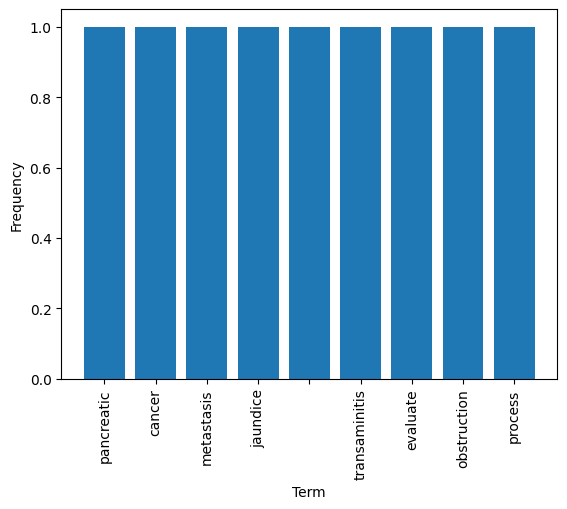

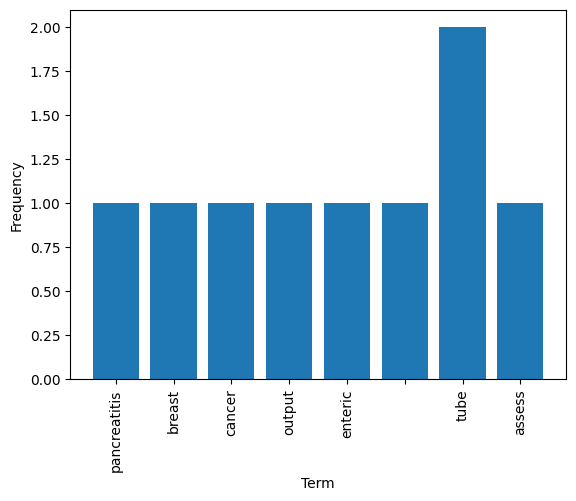

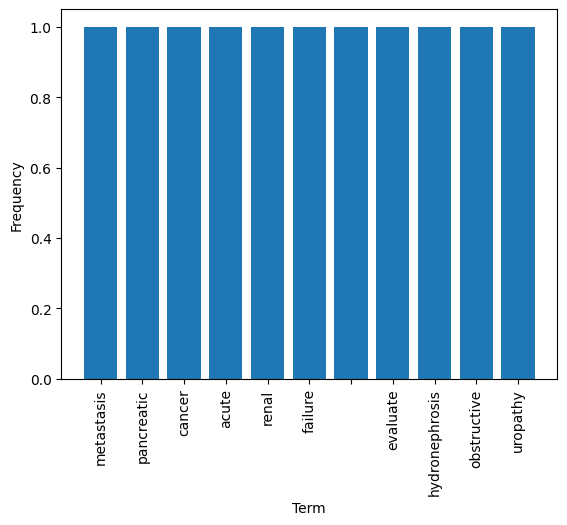

In [13]:
# Contar la frecuencia de cada término
term_freq = Counter(tokens)

# Crear un histograma de los términos más comunes
plt.bar(term_freq.keys(), term_freq.values())
plt.xticks(rotation=90)
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.show()

# Contar la frecuencia de cada término
term_freq2 = Counter(tokens2)

# Crear un histograma de los términos más comunes
plt.bar(term_freq2.keys(), term_freq2.values())
plt.xticks(rotation=90)
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.show()

# Contar la frecuencia de cada término
term_freq3 = Counter(tokens3)

# Crear un histograma de los términos más comunes
plt.bar(term_freq3.keys(), term_freq3.values())
plt.xticks(rotation=90)
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.show()


##Tecnicas para el documento 1

In [14]:
#One-hot encoding
# Crear una tabla de términos y documentos
docs = [tokens]
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con '1' seguido de la palabra si está presente en el documento
    row = ['1 ' + term if term in doc else '' for doc in docs]
    term_doc_matrix.append(row)


for row in term_doc_matrix:
    print(row)

print("\n")


# Term Count
# Crear una tabla de términos y documentos
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con el conteo de la palabra en el documento y la palabra misma
    row = [(str(doc.count(term)), term) for doc in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz de término-presencia
for row in term_doc_matrix:
    print(row)

print("\n")


#Probabilidad del término
# Crear una tabla de términos
print("Term Probability:")
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con la probabilidad de la palabra en el documento y la palabra misma
    row = [(str(doc.count(term) / len(doc)), term) for doc in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz de término-presencia
for row in term_doc_matrix:
    print(row)

print("\n")


# Term Frequency (TF)
# Crear una tabla de términos
print("TF:")
term_doc_matrix_tf = []

for term in term_freq.keys():
    # Calcular la frecuencia de términos para cada documento
    row = [(doc.count(term) / len(doc)) for doc in docs]
    term_doc_matrix_tf.append(row)

# Imprimir la matriz de frecuencia de términos (TF)
for row in term_doc_matrix_tf:
    print(row)

print("\n")

# Inverse Document Frequency (IDF)
# Calcular el IDF para cada término
print("IDF:")
term_doc_matrix = []

for term in term_freq.keys():
    # Contar el número de documentos que contienen el término
    doc_count = sum([1 for doc in docs if term in doc])
    # Calcular el IDF
    term_doc_matrix.append((term,len(docs) / doc_count))

for term, value in term_doc_matrix:
    print(term, value)

print("\n")


# Term Frequency-Inverse Document Frequency (TF-IDF)
# Calcular el TF-IDF para cada término en cada documento
print("TF-IDF:")
term_doc_matrix = []

for term in term_freq.keys():
    # Calcular el IDF
    doc_count = sum([1 for doc in docs if term in doc])
    idf = len(docs) / doc_count
    # Calcular el TF-IDF para cada documento
    row = [(doc.count(term) / len(doc)) * idf for doc in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz TF-IDF
for row in term_doc_matrix:
    print(row)


['1 pancreatic']
['1 cancer']
['1 metastasis']
['1 jaundice']
['1 \n']
['1 transaminitis']
['1 evaluate']
['1 obstruction']
['1 process']


[('1', 'pancreatic')]
[('1', 'cancer')]
[('1', 'metastasis')]
[('1', 'jaundice')]
[('1', '\n')]
[('1', 'transaminitis')]
[('1', 'evaluate')]
[('1', 'obstruction')]
[('1', 'process')]


Term Probability:
[('0.1111111111111111', 'pancreatic')]
[('0.1111111111111111', 'cancer')]
[('0.1111111111111111', 'metastasis')]
[('0.1111111111111111', 'jaundice')]
[('0.1111111111111111', '\n')]
[('0.1111111111111111', 'transaminitis')]
[('0.1111111111111111', 'evaluate')]
[('0.1111111111111111', 'obstruction')]
[('0.1111111111111111', 'process')]


TF:
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]


IDF:
pancreatic 1.0
cancer 1.0
metastasis 1.0
jaundice 1.0

 1.0
transaminitis 1.0
evaluate 1.0
obstruction 1.0
process 1.0


##Tecnicas para el documento 2

In [15]:
##Pasar term_freq2 a term_freq
term_freq = term_freq2
docs = [tokens2]

#One-hot encoding
# Crear una tabla de términos y documentos
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con '1' seguido de la palabra si está presente en el documento
    row = ['1 ' + term if term in doc2 else '' for doc2 in docs]
    term_doc_matrix.append(row)


for row in term_doc_matrix:
    print(row)

print("\n")


# Term Count
# Crear una tabla de términos y documentos
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con el conteo de la palabra en el documento y la palabra misma
    row = [(str(doc2.count(term)), term) for doc2 in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz de término-presencia
for row in term_doc_matrix:
    print(row)

print("\n")


#Probabilidad del término
# Crear una tabla de términos
print("Term Probability:")
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con la probabilidad de la palabra en el documento y la palabra misma
    row = [(str(doc2.count(term) / len(doc2)), term) for doc2 in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz de término-presencia
for row in term_doc_matrix:
    print(row)

print("\n")


# Term Frequency (TF)
# Crear una tabla de términos
print("TF:")
term_doc_matrix_tf = []

for term in term_freq.keys():
    # Calcular la frecuencia de términos para cada documento
    row = [(doc2.count(term) / len(doc2)) for doc2 in docs]
    term_doc_matrix_tf.append(row)

# Imprimir la matriz de frecuencia de términos (TF)
for row in term_doc_matrix_tf:
    print(row)

print("\n")

# Inverse Document Frequency (IDF)
# Calcular el IDF para cada término
print("IDF:")
term_doc_matrix = []

for term in term_freq.keys():
    # Contar el número de documentos que contienen el término
    doc_count = sum([1 for doc2 in docs if term in doc2])
    # Calcular el IDF
    term_doc_matrix.append((term,len(docs) / doc_count))

for term, value in term_doc_matrix:
    print(term, value)

print("\n")


# Term Frequency-Inverse Document Frequency (TF-IDF)
# Calcular el TF-IDF para cada término en cada documento
print("TF-IDF:")
term_doc_matrix = []

for term in term_freq.keys():
    # Calcular el IDF
    doc_count = sum([1 for doc2 in docs if term in doc2])
    idf = len(docs) / doc_count
    # Calcular el TF-IDF para cada documento
    row = [(doc2.count(term) / len(doc2)) * idf for doc2 in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz TF-IDF
for row in term_doc_matrix:
    print(row)





['1 pancreatitis']
['1 breast']
['1 cancer']
['1 output']
['1 enteric']
['1 \n']
['1 tube']
['1 assess']


[('1', 'pancreatitis')]
[('1', 'breast')]
[('1', 'cancer')]
[('1', 'output')]
[('1', 'enteric')]
[('1', '\n')]
[('2', 'tube')]
[('1', 'assess')]


Term Probability:
[('0.1111111111111111', 'pancreatitis')]
[('0.1111111111111111', 'breast')]
[('0.1111111111111111', 'cancer')]
[('0.1111111111111111', 'output')]
[('0.1111111111111111', 'enteric')]
[('0.1111111111111111', '\n')]
[('0.2222222222222222', 'tube')]
[('0.1111111111111111', 'assess')]


TF:
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.2222222222222222]
[0.1111111111111111]


IDF:
pancreatitis 1.0
breast 1.0
cancer 1.0
output 1.0
enteric 1.0

 1.0
tube 1.0
assess 1.0


TF-IDF:
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.1111111111111111]
[0.2222222222222222]
[0.1111111111111111]


In [16]:
term_freq = term_freq3
docs = [tokens3]
#One-hot encoding
# Crear una tabla de términos y documentos
print("One-hot encoding:")
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con '1' seguido de la palabra si está presente en el documento
    row = ['1 ' + term if term in doc3 else '' for doc3 in docs]
    term_doc_matrix.append(row)


for row in term_doc_matrix:
    print(row)

print("\n")


# Term Count
# Crear una tabla de términos y documentos
print("Term Count:")
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con el conteo de la palabra en el documento y la palabra misma
    row = [(str(doc3.count(term)), term) for doc3 in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz de término-presencia
for row in term_doc_matrix:
    print(row)

print("\n")


#Probabilidad del término
# Crear una tabla de términos
print("Term Probability:")
term_doc_matrix = []

for term in term_freq.keys():
    # Crear una fila con la probabilidad de la palabra en el documento y la palabra misma
    row = [(str(doc3.count(term) / len(doc3)), term) for doc3 in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz de término-presencia
for row in term_doc_matrix:
    print(row)

print("\n")


# Term Frequency (TF)
# Crear una tabla de términos
print("TF:")
term_doc_matrix_tf = []

for term in term_freq.keys():
    # Calcular la frecuencia de términos para cada documento
    row = [(doc3.count(term) / len(doc3)) for doc3 in docs]
    term_doc_matrix_tf.append(row)

# Imprimir la matriz de frecuencia de términos (TF)
for row in term_doc_matrix_tf:
    print(row)

print("\n")

# Inverse Document Frequency (IDF)
# Calcular el IDF para cada término
print("IDF:")
term_doc_matrix = []

for term in term_freq.keys():
    # Contar el número de documentos que contienen el término
    doc_count = sum([1 for doc3 in docs if term in doc3])
    # Calcular el IDF
    term_doc_matrix.append((term,len(docs) / doc_count))

for term, value in term_doc_matrix:
    print(term, value)

print("\n")


# Term Frequency-Inverse Document Frequency (TF-IDF)
# Calcular el TF-IDF para cada término en cada documento
print("TF-IDF:")
term_doc_matrix = []

for term in term_freq.keys():
    # Calcular el IDF
    doc_count = sum([1 for doc3 in docs if term in doc3])
    idf = len(docs) / doc_count
    # Calcular el TF-IDF para cada documento
    row = [(doc3.count(term) / len(doc3)) * idf for doc3 in docs]
    term_doc_matrix.append(row)

# Imprimir la matriz TF-IDF
for row in term_doc_matrix:
    print(row)

One-hot encoding:
['1 metastasis']
['1 pancreatic']
['1 cancer']
['1 acute']
['1 renal']
['1 failure']
['1 \n']
['1 evaluate']
['1 hydronephrosis']
['1 obstructive']
['1 uropathy']


Term Count:
[('1', 'metastasis')]
[('1', 'pancreatic')]
[('1', 'cancer')]
[('1', 'acute')]
[('1', 'renal')]
[('1', 'failure')]
[('1', '\n')]
[('1', 'evaluate')]
[('1', 'hydronephrosis')]
[('1', 'obstructive')]
[('1', 'uropathy')]


Term Probability:
[('0.09090909090909091', 'metastasis')]
[('0.09090909090909091', 'pancreatic')]
[('0.09090909090909091', 'cancer')]
[('0.09090909090909091', 'acute')]
[('0.09090909090909091', 'renal')]
[('0.09090909090909091', 'failure')]
[('0.09090909090909091', '\n')]
[('0.09090909090909091', 'evaluate')]
[('0.09090909090909091', 'hydronephrosis')]
[('0.09090909090909091', 'obstructive')]
[('0.09090909090909091', 'uropathy')]


TF:
[0.09090909090909091]
[0.09090909090909091]
[0.09090909090909091]
[0.09090909090909091]
[0.09090909090909091]
[0.09090909090909091]
[0.0909090909